In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import pickle
sys.path.append(r"C:\Users\Alireza\Documents\Git\Cosine-Project")
from inSilico_experiments.utils.pothook_analysis_lib import *
from torchvision.transforms import ToTensor, ToPILImage, Pad, Compose
from torchvision.utils import make_grid
from core.utils.CNN_scorers import resize_and_pad_tsr

In [2]:
# read npy file 
pd_key="expriment_meta_data_df"
population_act_tensor = np.load(r"N:\PonceLab\Users\Alireza\insilico_experiments\quest_of_image_manifould\data_alexnet_conv5\encoded_centeral_col\population_act_tensor.npy")
metadata_df = pd.read_hdf(r"N:\PonceLab\Users\Alireza\insilico_experiments\quest_of_image_manifould\data_alexnet_conv5\encoded_centeral_col\expriment_meta_data_df.h5", key=pd_key)
save_root = r"N:\PonceLab\Users\Alireza\insilico_experiments\quest_of_image_manifould\data_alexnet_conv5\results"
os.makedirs(save_root, exist_ok=True)


In [3]:
# get all uinqe images folders column values
all_image_class = np.unique(metadata_df["img_folder"].values)


(array([ 1.,  1., 10., 17., 42., 63., 77., 34.,  9.,  2.]),
 array([-10.08139522,  -9.18873045,  -8.29606568,  -7.40340091,
         -6.51073613,  -5.61807136,  -4.72540659,  -3.83274182,
         -2.94007704,  -2.04741227,  -1.1547475 ]),
 <BarContainer object of 10 artists>)

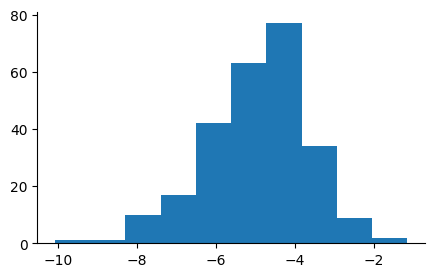

In [12]:
plt.figure(figsize=(5, 3))
plt.hist(population_act_tensor.mean(axis=0))

In [9]:
population_act_tensor.std(axis=0).shape

(256,)

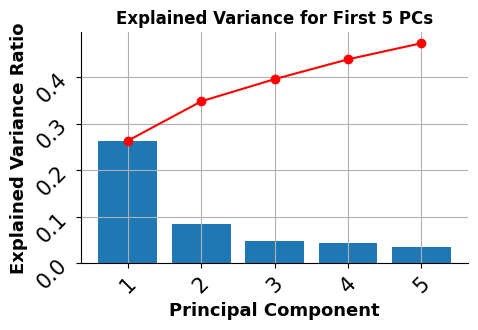

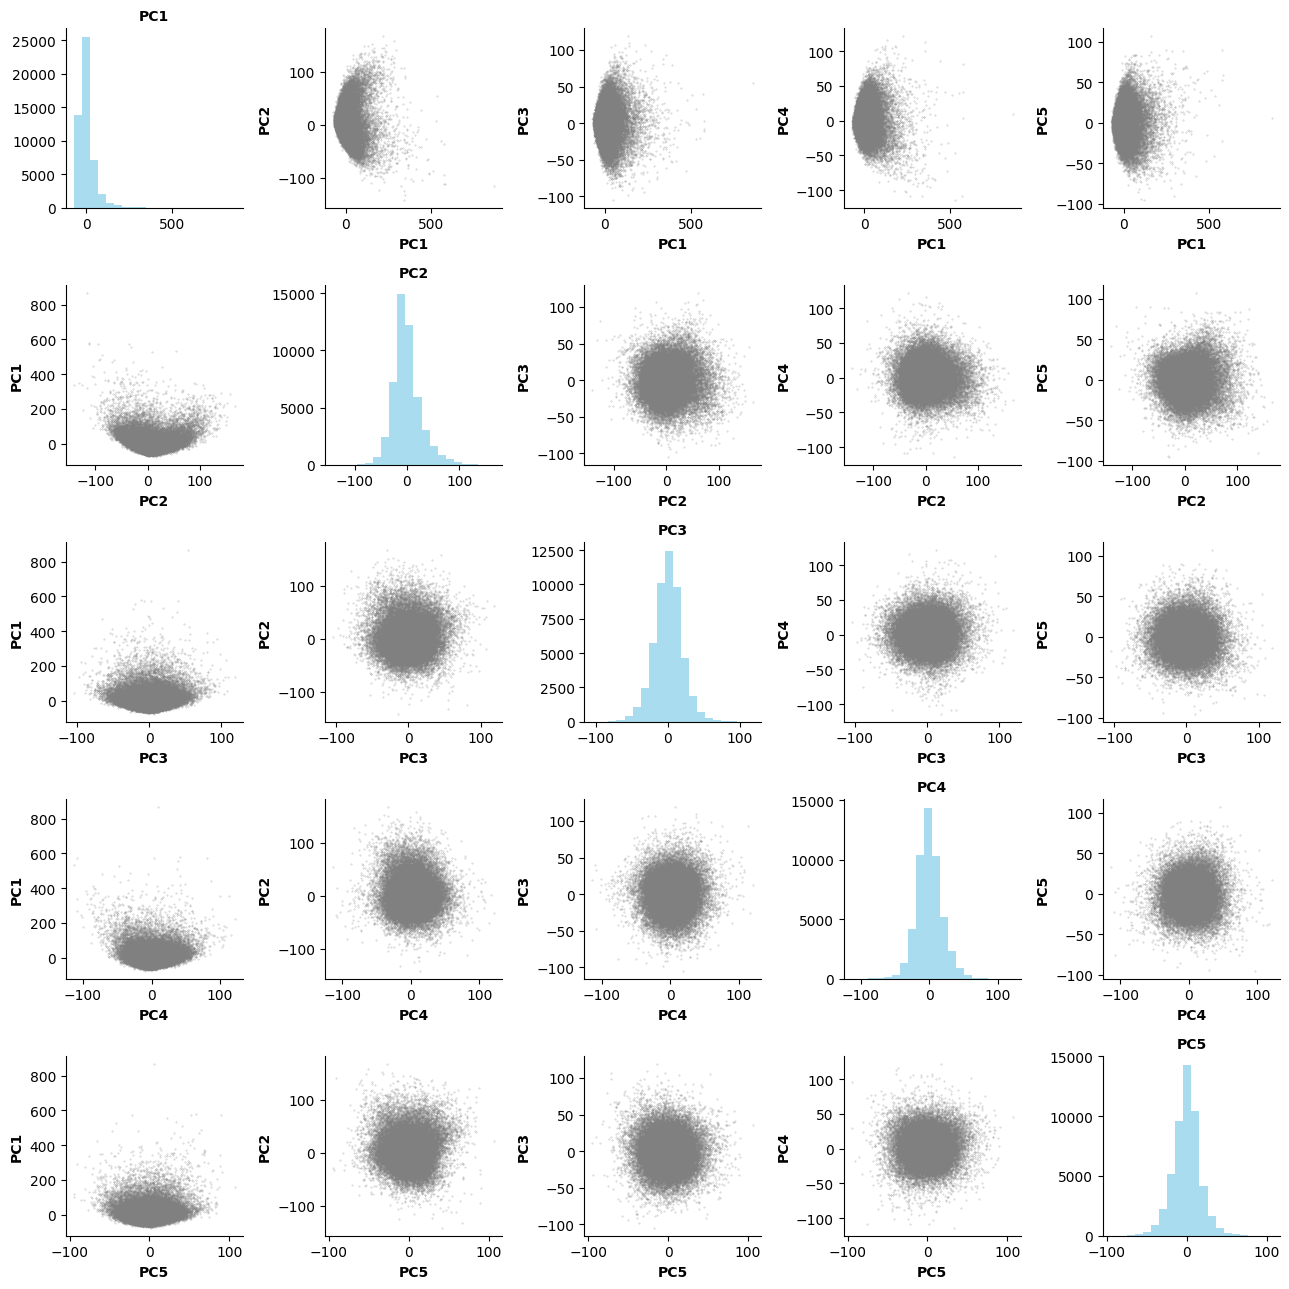

In [27]:
# practice for PCA, MDS clustering and visualization
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Perform PCA
n_components = 5
drobj = PCA(n_components=n_components)  # Choose the number of components
# zscore the data
dr_trans = drobj.fit_transform(population_act_tensor)


if drobj.__class__.__name__ == 'PCA':

    #Calculate explained variance ratios
    explained_variance_ratios = drobj.explained_variance_ratio_


    # Pareto plot of explained variance
    plt.figure(figsize=(5, 3))
    plt.bar(range(1, n_components+1), explained_variance_ratios, align='center')
    plt.xticks(range(1, n_components+1))
    plt.xlabel('Principal Component', fontweight='bold', fontsize=13)
    plt.ylabel('Explained Variance Ratio', fontweight='bold', fontsize=13)
    plt.title(f'Explained Variance for First {n_components} PCs', fontweight='bold')
    # add line plot of cumulative explained variance
    plt.plot(range(1, n_components+1), np.cumsum(explained_variance_ratios), c='red', marker='o')
    # increas ticks font size and rotation 45 degree
    plt.tick_params(axis='both', which='major', labelsize=15, rotation=45)

    plt.grid()    
    plt.savefig(os.path.join(save_root, "PCA_explained_variance.png"), dpi=300, bbox_inches='tight')
    plt.show()


# Visualize the first five principal components
fig, axs = plt.subplots(n_components, n_components, figsize=(13, 13))

for i in range(5):
    for j in range(5):
        if i == j:
            axs[i, j].hist(dr_trans[:, i], bins=20, color='skyblue', alpha=0.7)
            axs[i, j].set_title(f'PC{i+1}', fontweight='bold')
        else:
            axs[i, j].scatter(dr_trans[:, i], dr_trans[:, j], alpha=0.5, s=.1, c='gray')
            axs[i, j].set_xlabel(f'PC{i+1}', fontweight='bold')
            axs[i, j].set_ylabel(f'PC{j+1}', fontweight='bold')
        # decrease the font size
        for item in ([axs[i, j].title, axs[i, j].xaxis.label, axs[i, j].yaxis.label] +
                     axs[i, j].get_xticklabels() + axs[i, j].get_yticklabels()):
                    item.set_fontsize(10)
plt.tight_layout()       
plt.savefig(os.path.join(save_root, "PCA_first_5_components_all_cat.png"), dpi=300, bbox_inches='tight')  
plt.show() 

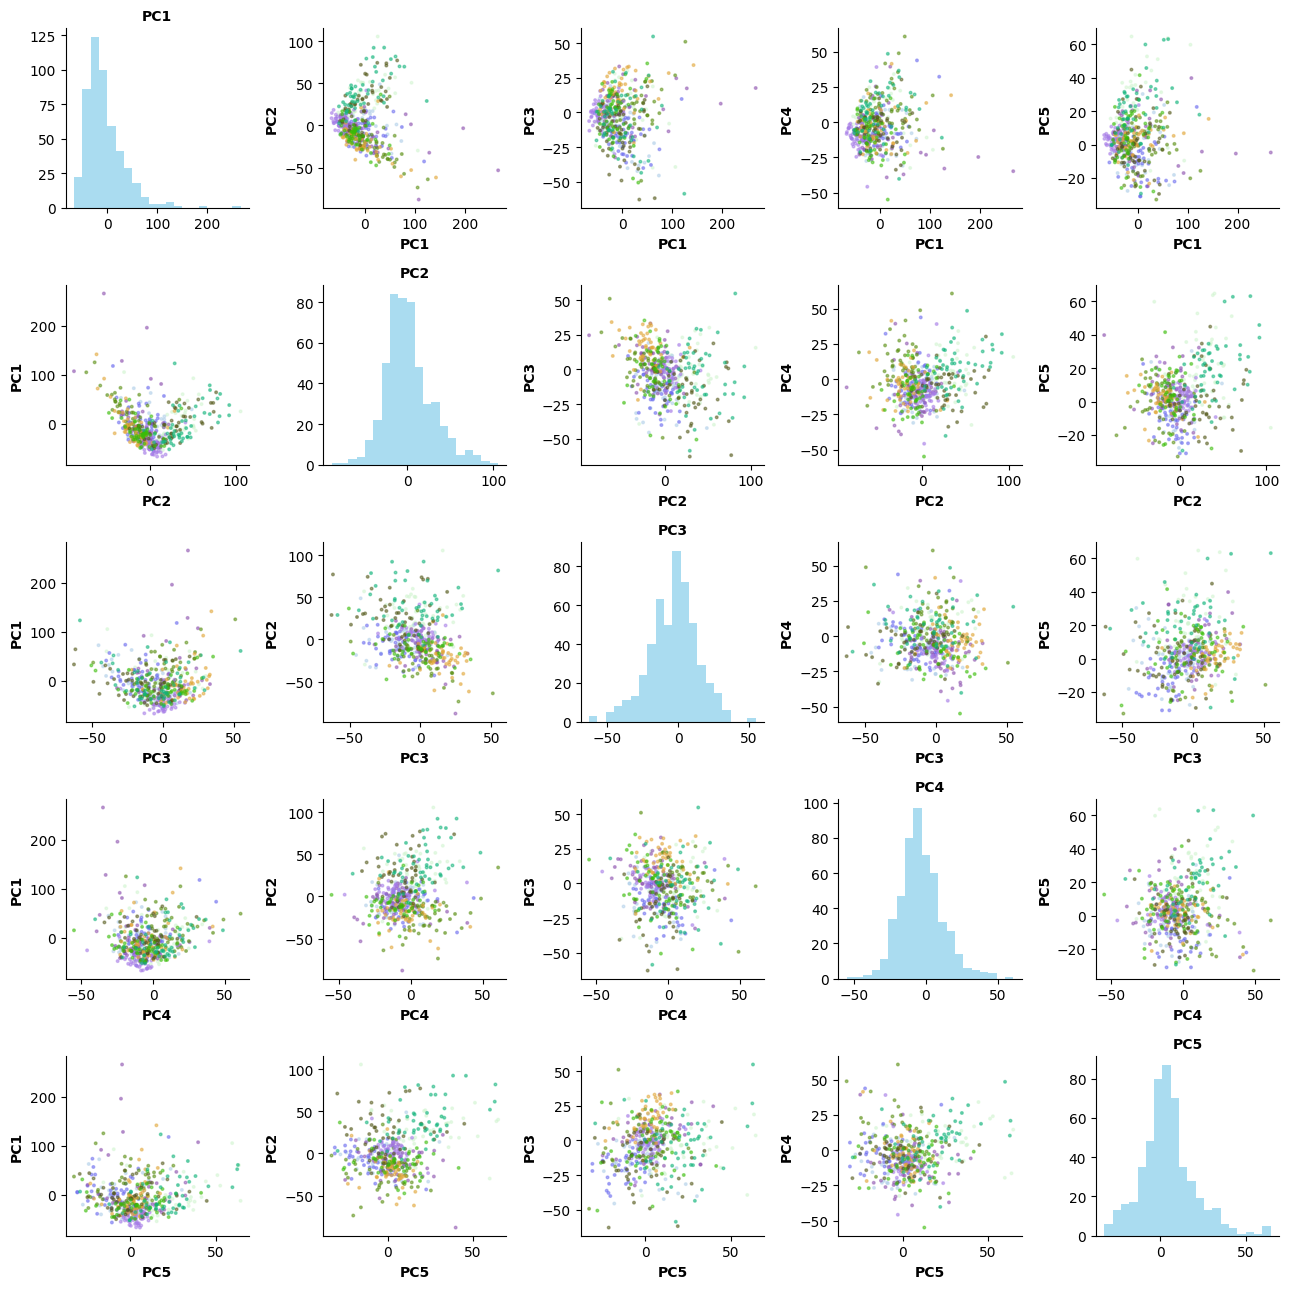

Fold 1: Accuracy = 0.70
Fold 2: Accuracy = 0.56
Fold 3: Accuracy = 0.66
Fold 4: Accuracy = 0.70
Fold 5: Accuracy = 0.72
Fold 6: Accuracy = 0.54
Fold 7: Accuracy = 0.70
Fold 8: Accuracy = 0.64
Fold 9: Accuracy = 0.62
Fold 10: Accuracy = 0.64

Average Accuracy: 0.6479999999999999


In [23]:
# quest for random classes selection decoding accuracy
# select 5 andom calses
random_classes = np.random.choice(all_image_class, 10, replace=False)
color_map = np.zeros((len(dr_trans), 3))
color_map[:] = [0.5, 0.5, 0.5]
celect_class_idx = []
class_labels = []
for i, class_name in enumerate(random_classes):
    class_idx = np.where(metadata_df["img_folder"] == class_name)[0]
    celect_class_idx.append(class_idx)
    class_labels.append([i]*len(class_idx))
    color_map[class_idx] = np.random.rand(3)
celect_class_idx = np.concatenate(celect_class_idx, axis=0, dtype=int)
class_labels = np.concatenate(class_labels, axis=0, dtype=int)



# Visualize the first five principal components
fig, axs = plt.subplots(5, 5, figsize=(13, 13))

for i in range(5):
    for j in range(5):
        if i == j:
            axs[i, j].hist(dr_trans[celect_class_idx, i], bins=20, color='skyblue', alpha=0.7)
            axs[i, j].set_title(f'PC{i+1}', fontweight='bold')
        else:
            axs[i, j].scatter(dr_trans[celect_class_idx, i], dr_trans[celect_class_idx, j], alpha=0.5, s=3.5, c=color_map[celect_class_idx])
            axs[i, j].set_xlabel(f'PC{i+1}', fontweight='bold')
            axs[i, j].set_ylabel(f'PC{j+1}', fontweight='bold')
        # decrease the font size
        for item in ([axs[i, j].title, axs[i, j].xaxis.label, axs[i, j].yaxis.label] +
                     axs[i, j].get_xticklabels() + axs[i, j].get_yticklabels()):
                    item.set_fontsize(10)
plt.tight_layout()
              
plt.savefig(os.path.join(save_root, "PCA_first_5_components_10_randomcat_selection.png"), dpi=300, bbox_inches='tight')  
plt.show()  

# run svm dcider on the population activity tensor to see the classifcation accuracy
from sklearn import svm
from sklearn.model_selection import cross_val_score

# Generate example data (replace this with your actual data)
X = population_act_tensor[celect_class_idx, :]
y = class_labels

# Initialize the SVM classifier
clf = svm.SVC(kernel='linear')  # You can change the kernel as needed

# Perform 10-fold cross-validation
num_folds = 10
accuracy_scores = cross_val_score(clf, X, y, cv=num_folds)

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores, start=1):
    print(f"Fold {fold}: Accuracy = {accuracy:.2f}")

# Calculate the average accuracy across folds
average_accuracy = np.mean(accuracy_scores)
print("\nAverage Accuracy:", average_accuracy)

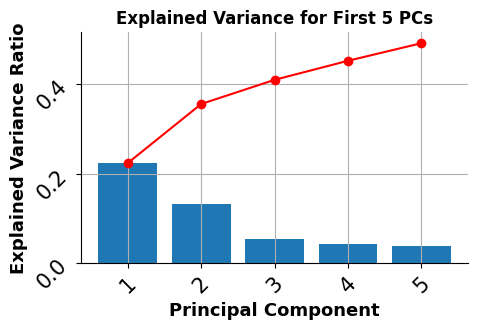

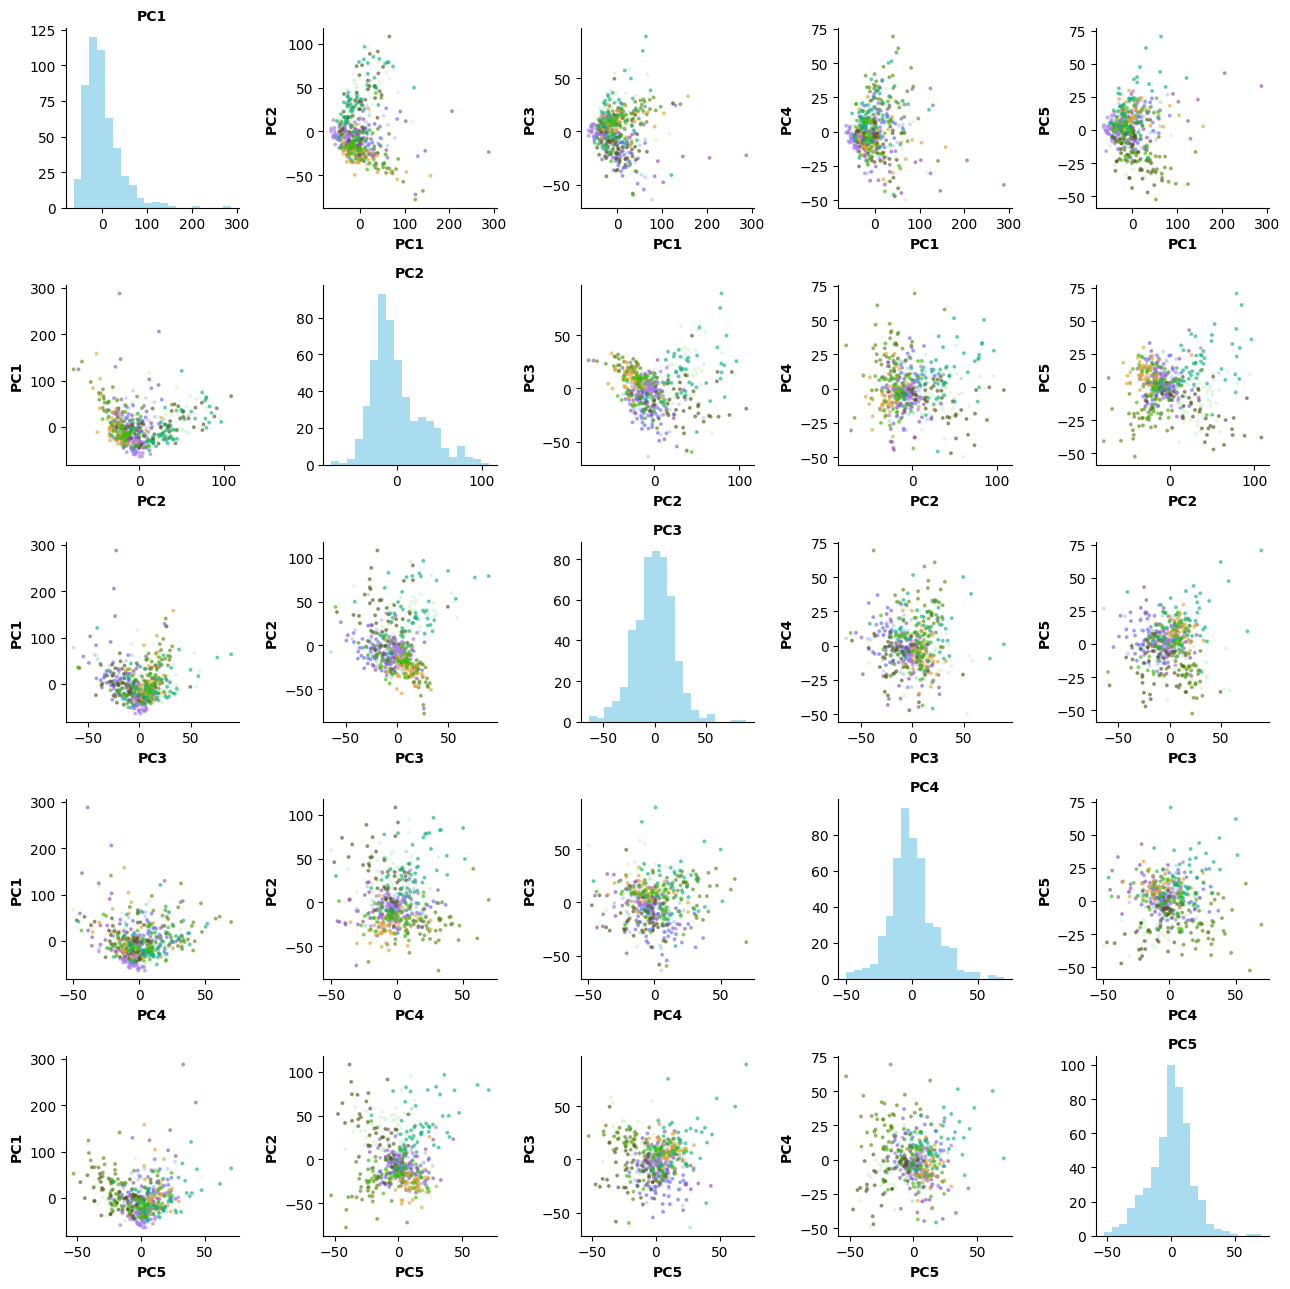

In [24]:
# PCA for selected classes
population_act_tensor_sample = population_act_tensor[celect_class_idx, :]
colormp_sample = color_map[celect_class_idx, :]

n_components = 5
drobj_sample = PCA(n_components=n_components)  # Choose the number of components
dr_trans_sample = drobj_sample.fit_transform(population_act_tensor_sample)


if drobj_sample.__class__.__name__ == 'PCA':

    #Calculate explained variance ratios
    explained_variance_ratios = drobj_sample.explained_variance_ratio_


    # Pareto plot of explained variance
    plt.figure(figsize=(5, 3))
    plt.bar(range(1, n_components+1), explained_variance_ratios, align='center')
    plt.xticks(range(1, n_components+1))
    plt.xlabel('Principal Component', fontweight='bold', fontsize=13)
    plt.ylabel('Explained Variance Ratio', fontweight='bold', fontsize=13)
    plt.title(f'Explained Variance for First {n_components} PCs', fontweight='bold')
    # add line plot of cumulative explained variance
    plt.plot(range(1, n_components+1), np.cumsum(explained_variance_ratios), c='red', marker='o')
    # increas ticks font size and rotation 45 degree
    plt.tick_params(axis='both', which='major', labelsize=15, rotation=45)

    plt.grid()
   
    plt.savefig(os.path.join(save_root, "PCA_explained_variance_10_sample.png"), dpi=300, bbox_inches='tight')
    plt.show()
# Visualize the first five principal components
fig, axs = plt.subplots(5, 5, figsize=(13, 13))

for i in range(5):
    for j in range(5):
        if i == j:
            axs[i, j].hist(dr_trans_sample[:, i], bins=20, color='skyblue', alpha=0.7)
            axs[i, j].set_title(f'PC{i+1}', fontweight='bold')
        else:
            axs[i, j].scatter(dr_trans_sample[:, i], dr_trans_sample[:, j], alpha=0.5, s=3.5, c=colormp_sample)
            axs[i, j].set_xlabel(f'PC{i+1}', fontweight='bold')
            axs[i, j].set_ylabel(f'PC{j+1}', fontweight='bold')
        # decrease the font size
        for item in ([axs[i, j].title, axs[i, j].xaxis.label, axs[i, j].yaxis.label] +
                     axs[i, j].get_xticklabels() + axs[i, j].get_yticklabels()):
                    item.set_fontsize(10)
plt.tight_layout()               
plt.savefig(os.path.join(save_root, "sample_PCA_first_5_components_10_randomcat_selection.png"), dpi=300, bbox_inches='tight')  
plt.show()

In [ ]:
n_components = 5
drobj = PCA(n_components=n_components)  # Choose the number of components
dr_trans = drobj.fit_transform(population_act_tensor)


if drobj.__class__.__name__ == 'PCA':

    #Calculate explained variance ratios
    explained_variance_ratios = drobj.explained_variance_ratio_


    # Pareto plot of explained variance
    plt.figure(figsize=(5, 3))
    plt.bar(range(1, n_components+1), explained_variance_ratios, align='center')
    plt.xticks(range(1, n_components+1))
    plt.xlabel('Principal Component', fontweight='bold', fontsize=13)
    plt.ylabel('Explained Variance Ratio', fontweight='bold', fontsize=13)
    plt.title(f'Explained Variance for First {n_components} PCs', fontweight='bold')
    # add line plot of cumulative explained variance
    plt.plot(range(1, n_components+1), np.cumsum(explained_variance_ratios), c='red', marker='o')
    # increas ticks font size and rotation 45 degree
    plt.tick_params(axis='both', which='major', labelsize=15, rotation=45)

    plt.grid()
    plt.show()
    plt.savefig(os.path.join(save_root, "PCA_explained_variance.png"), dpi=300, bbox_inches='tight')

In [ ]:
# run svm dcider on the population activity tensor to see the classifcation accuracy
import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score
# sample data 
random_classes = np.random.choice(all_image_class, 100, replace=False)
# make a color map that this swlwcted class are diffrent colors but all other are gray
celect_class_idx = []
class_labels = []
for i, class_name in enumerate(random_classes):
    class_idx = np.where(metadata_df["img_folder"] == class_name)[0]
    celect_class_idx.append(class_idx)
    class_labels.append([i]*len(class_idx))
celect_class_idx = np.concatenate(celect_class_idx, axis=0, dtype=int)
class_labels = np.concatenate(class_labels, axis=0, dtype=int)

# 
# Generate example data (replace this with your actual data)
X = population_act_tensor[celect_class_idx, :]
y = class_labels

# Initialize the SVM classifier
clf = svm.SVC(kernel='linear')  # You can change the kernel as needed

# Perform 10-fold cross-validation
num_folds = 10
accuracy_scores = cross_val_score(clf, X, y, cv=num_folds)

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores, start=1):
    print(f"Fold {fold}: Accuracy = {accuracy:.2f}")

# Calculate the average accuracy across folds
average_accuracy = np.mean(accuracy_scores)
print("\nAverage Accuracy:", average_accuracy)

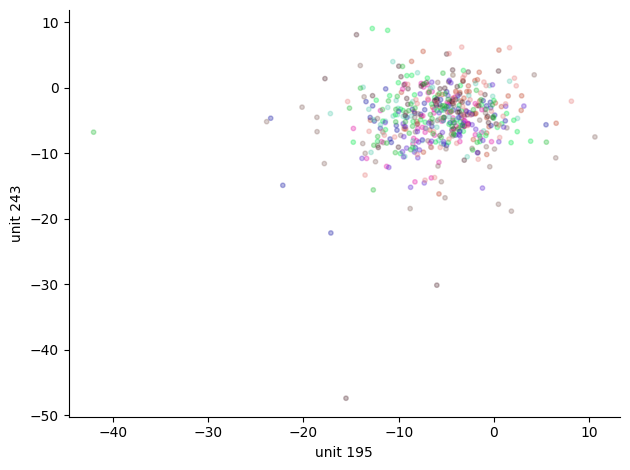

In [92]:
# scater plot of two random columns of the population activity tensor
# slelect two random columns
# select 5 andom calses
random_classes = np.random.choice(all_image_class, 10, replace=False)
# make a color map that this swlwcted class are diffrent colors but all other are gray
color_map = np.zeros((len(dr_trans), 3))
color_map[:] = [0.5, 0.5, 0.5]
celect_class_idx = []
for i, class_name in enumerate(random_classes):
    class_idx = np.where(metadata_df["img_folder"] == class_name)[0]
    celect_class_idx.append(class_idx)
    color_map[class_idx] = np.random.rand(3)
celect_class_idx = np.concatenate(celect_class_idx, axis=0, dtype=int)

col_1 = np.random.randint(0, population_act_tensor.shape[1])
col_2 = np.random.randint(0, population_act_tensor.shape[1])
plt.scatter(population_act_tensor[celect_class_idx, col_1], population_act_tensor[celect_class_idx, col_2], s=10, alpha=0.3, c=color_map[celect_class_idx, :])
plt.xlabel(f"unit {col_1}")
plt.ylabel(f"unit {col_2}")
plt.tight_layout()
plt.show()

C:\Users\Alireza\AppData\Local\Temp\ipykernel_2728\411487653.py:8: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = hierarchy.linkage(simlarity_matrix, method='complete')


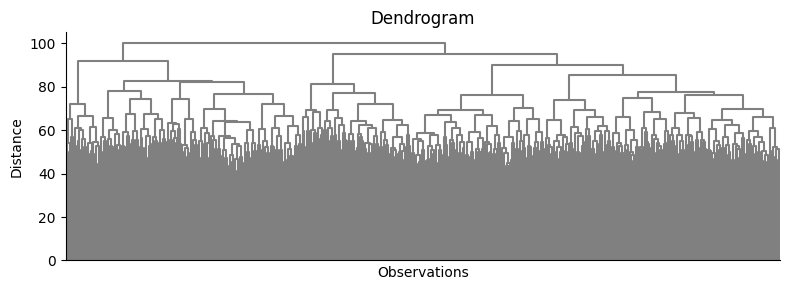

MemoryError: Unable to allocate 18.6 GiB for an array with shape (50000, 50000) and data type float64

Error in callback <function _draw_all_if_interactive at 0x000001ED77884940> (for post_execute):


MemoryError: Unable to allocate 18.6 GiB for an array with shape (50000, 50000) and data type float64

MemoryError: Unable to allocate 18.6 GiB for an array with shape (50000, 50000) and data type float64

<Figure size 1000x1000 with 2 Axes>

In [28]:
# plot the similarity matrix of the population activity tensor
from sklearn.metrics import pairwise_distances
from scipy.cluster import hierarchy
# ramdomly sample 1000 images from the population activity tensor
metric = 'correlation'
# corcoef similarity matrix
simlarity_matrix = pairwise_distances(population_act_tensor, metric=metric)
linkage_matrix = hierarchy.linkage(simlarity_matrix, method='complete')
# Plot the dendrogram
plt.figure(figsize=(8, 3))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=range(simlarity_matrix.shape[1]), color_threshold=0, above_threshold_color='grey')
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
plt.xticks([])
plt.tight_layout()
# save the figure
plt.savefig(os.path.join(save_root, "dendrogram.png"), dpi=300, bbox_inches='tight')
plt.show()


sorted_indices = dendrogram['leaves']
sorted_simlarity_matrix = simlarity_matrix[sorted_indices, :]
sorted_simlarity_matrix = sorted_simlarity_matrix[:, sorted_indices]
# make the diagonal None
np.fill_diagonal(sorted_simlarity_matrix, None)
ax, fig = plt.subplots(figsize=(10, 10))
plt.imshow(sorted_simlarity_matrix)
plt.colorbar()
plt.title(f"Distance matrix of the population activity tensor\nmetric: {metric}")
plt.tight_layout()
plt.savefig(os.path.join(save_root, "distance_matrix.png"), dpi=300, bbox_inches='tight')
plt.show()

C:\Users\Alireza\AppData\Local\Temp\ipykernel_20364\2120883300.py:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = hierarchy.linkage(simlarity_matrix, method='complete')


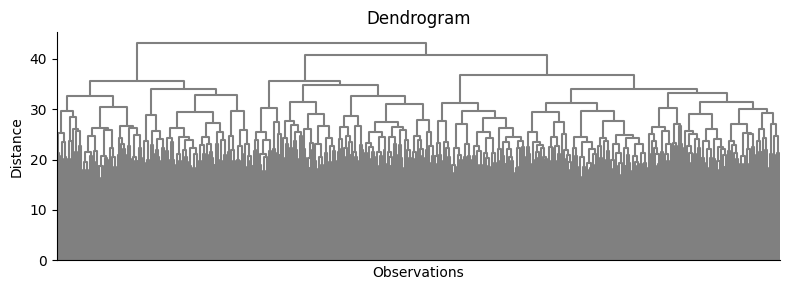

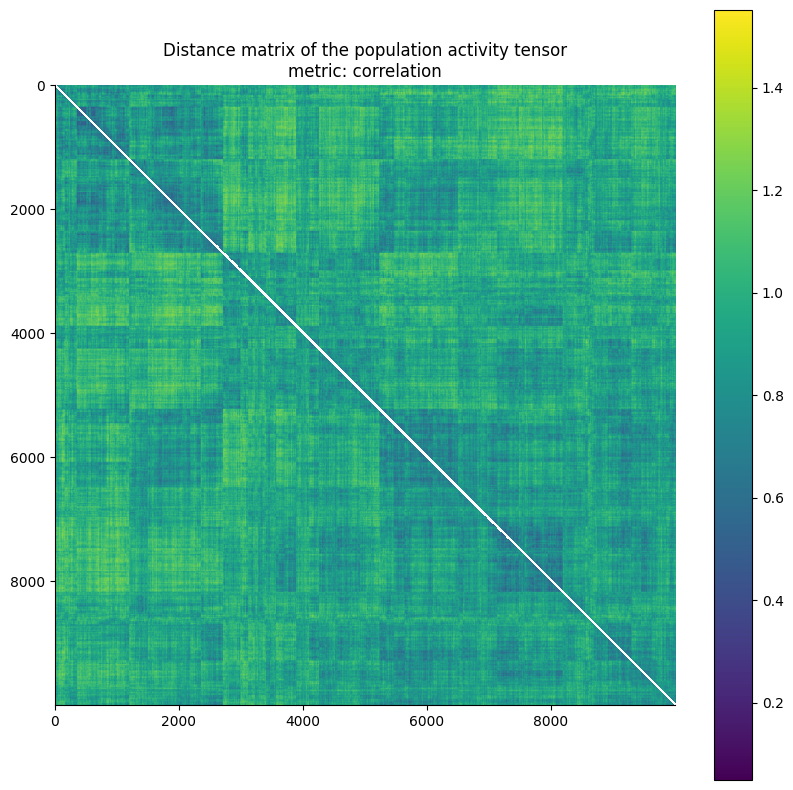

In [35]:
# plot the similarity matrix of the population activity tensor
from sklearn.metrics import pairwise_distances
from scipy.cluster import hierarchy
# ramdomly sample 1000 images from the population activity tensor
sample_size = 10000
sample_idx = np.random.choice(population_act_tensor.shape[0], sample_size, replace=False)
sample_act_tensor = population_act_tensor[sample_idx, :]
metric = 'correlation'
# corcoef similarity matrix
simlarity_matrix = pairwise_distances(sample_act_tensor, metric=metric, n_jobs=-1)
linkage_matrix = hierarchy.linkage(simlarity_matrix, method='complete')
# Plot the dendrogram
plt.figure(figsize=(8, 3))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=range(simlarity_matrix.shape[1]), color_threshold=0, above_threshold_color='grey')
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
plt.xticks([])
plt.tight_layout()
# save the figure
plt.show()

sorted_indices = dendrogram['leaves']
sorted_simlarity_matrix = simlarity_matrix[sorted_indices, :]
sorted_simlarity_matrix = sorted_simlarity_matrix[:, sorted_indices]
np.fill_diagonal(sorted_simlarity_matrix, None)
ax, fig = plt.subplots(figsize=(10, 10))
plt.imshow(sorted_simlarity_matrix)
plt.colorbar()
plt.title(f"Distance matrix of the population activity tensor\nmetric: {metric}")
plt.show()